In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/Users/aasthaprajapati/Desktop/MOCK_DATA (1).csv')

In [5]:
df

,weight,obese?
0,90.40,Not Obese
1,81.30,Not Obese
2,98.71,Not Obese
3,139.03,Obese
4,99.10,Not Obese
...,...,...
995,95.52,Not Obese
996,66.88,Not Obese
997,63.31,Not Obese
998,66.29,Not Obese


In [6]:
df['obese?'] = df['obese?'].astype('category')

In [7]:
df['obese?'].dtype

CategoricalDtype(categories=['Not Obese', 'Obese'], ordered=False)

In [8]:
df['obesity measure'] = df['obese?'].cat.codes

In [9]:
df = df.drop(columns='obese?')

In [10]:
df.head()

,weight,obesity measure
0,90.40,0
1,81.30,0
2,98.71,0
3,139.03,1
4,99.10,0


In [11]:
df['weight'] = (df['weight'] - df['weight'].min())/(df['weight'].max()-df['weight'].min())

In [12]:
(df[df['weight']>0.54] == 0).value_counts()

weight  obesity measure
False   False              466
        True                 4
dtype: int64

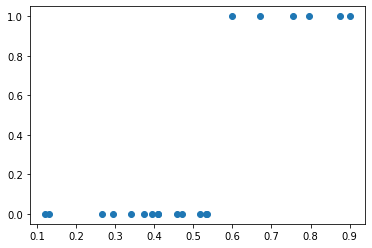

In [13]:
plt.scatter(df['weight'].iloc[0:20], df['obesity measure'].iloc[0:20])

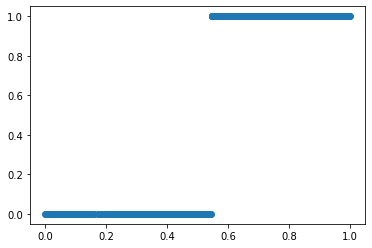

In [14]:
plt.scatter(df['weight'], df['obesity measure'])

In [15]:
df.head()

,weight,obesity measure
0,0.457237,0
1,0.374351,0
2,0.532926,0
3,0.900173,1
4,0.536479,0


In [16]:
split_percentage = 0.75
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

In [17]:
x = train.iloc[0:,0:-1].values
y = train.iloc[0:,-1:].values

x_test = test.iloc[0:,0:-1].values
y_test = test.iloc[0:,-1:].values

In [18]:
y.shape

(750, 1)

In [19]:
def sigmoid_function(x):
    sgmd = (1/(1+np.exp(-x)))
    
    return sgmd

In [41]:
def gradient_descent(x, y, w, b, learning_rate = 0.01, epoch = 5000):
    cost = []
    
    n = len(y)
    for i in range(epoch):
        
        z = x.dot(w) + b
        y_hat = sigmoid_function(z)
        r = y - y_hat
        
        cost.append((np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))/(-n))
        
        
        w = w - (-1/n)*(x.T.dot(r))*learning_rate
        b = b - (-1/n)*(np.sum(r))*learning_rate
        
    return w, b, cost
        
        

In [42]:
w = np.random.rand(x.shape[-1], 1)
b = np.random.rand()

In [43]:
w,b,cost = gradient_descent(x,y,w,b,0.01,40000)

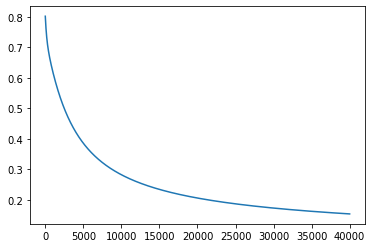

In [44]:
plt.plot(cost)

In [45]:
y_ = x.dot(w) + b

In [46]:
y_[0:10]

array([[-0.85649599],
       [ 3.77730036],
       [-0.02750096],
       [ 3.52955472],
       [-4.36876688],
       [-0.23903762],
       [ 2.68150233],
       [-1.52255061],
       [-0.72023588],
       [-2.5602237 ]])

In [47]:
y_hat = x.dot(w) + b

In [48]:
y_hat = sigmoid_function(y_hat)
y_hat = y_hat > 0.5
y_hat = np.array(y_hat, dtype = int)

In [49]:
def accuracy(x,y,w,b):
    z = x.dot(w) + b
    y_hat = sigmoid_function(z)
    
    y_hat = y_hat > 0.5
    
    y_hat = np.array(y_hat, dtype = int)
    
    accuracy = (1 - np.sum(np.abs(y-y_hat))/len(y))*100
    
    return accuracy

In [50]:
y_hat[0:5]

array([[0],
       [1],
       [0],
       [1],
       [0]])

In [51]:
y[0:5]

array([[0],
       [1],
       [0],
       [1],
       [0]], dtype=int8)

In [52]:
x[0:5]

array([[0.45723654],
       [0.90017306],
       [0.53647873],
       [0.87649148],
       [0.12150469]])

In [53]:
sigmoid_function(x[0:5].dot(w) + b)

array([[0.29807195],
       [0.97762759],
       [0.49312519],
       [0.97151709],
       [0.01250841]])

In [54]:
accuracy(x,y,w,b)

99.6

In [55]:
w,b

(array([[10.46153611]]), -5.639892586807894)

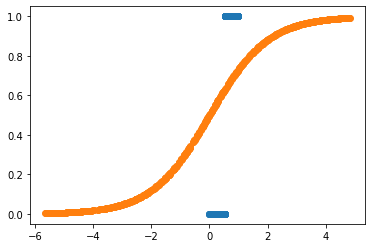

In [59]:
plt.scatter(df['weight'], df['obesity measure'])
plt.scatter(y_, sigmoid_function(y_)) ## our predicted sigmoid plot
# a = np.arange(-5,5,0.1)
# plt.plot(a, sigmoid_function(a)) ##dummy sigmoid plod to check accuracy

In [ ]:
sigmoid_function(0.54545454)

In [ ]:
a = np.arange(-20,20,0.5)
plt.plot(a, sigmoid_function(a))